# 1.Import Libraries

In [1]:
import gensim.downloader as api
import json
from gensim.models.word2vec import Word2Vec

import pandas as pd
import numpy as np

#Kmeans
from sklearn.cluster import KMeans

#T-SNE
from sklearn.manifold import MDS, TSNE

import altair as alt

import matplotlib.pyplot as plt


# 2.Download Pretrained Models

### 2.1 See available Models 

In [2]:
from gensim.models import KeyedVectors

#Embedding vectors generated above
model = KeyedVectors.load("C:/Dissertation/WordNet embeddings/sg200_wordnet_100_8_df_mc1_it3")

In [3]:
model.wv.key_to_index

{'wn-lemma:Southern_Tai#Southern_Tai-n': 128753,
 'ontolex:sense': 2,
 'wn-lemma:Southern_Tai#Southern_Tai-06948600-n': 128754,
 'ontolex:isLexicalizedSenseOf': 3,
 'wn-id:06948600-n': 56367,
 'http://wordnet-rdf.princeton.edu/ontology#hypernym': 0,
 'wn-id:06947166-n': 1816,
 'http://wordnet-rdf.princeton.edu/ontology#hyponym': 1,
 'wn-id:06948688-n': 58660,
 'http://wordnet-rdf.princeton.edu/ontology#definition': 25,
 '_:genid297857': 495983,
 'wn-id:06947888-n': 38259,
 'wn-id:06948847-n': 56368,
 'http://wordnet-rdf.princeton.edu/ontology#partOfSpeech': 22,
 'http://wordnet-rdf.princeton.edu/ontology#noun': 27,
 'wn-id:06948290-n': 53873,
 'wn-id:06947793-n': 44417,
 '_:genid297834': 483029,
 'http://www.w3.org/2002/07/owl#sameAs': 23,
 'http://ili.globalwordnet.org/ili/i73023': 503941,
 'wn-id:06948767-n': 55332,
 'http://ili.globalwordnet.org/ili/i73032': 494405,
 'rdf:type': 20,
 'ontolex:LexicalConcept': 24,
 'wn-id:06949067-n': 44418,
 'wn-id:06948091-n': 47115,
 '_:genid29784

# 3. Import Animal Data

### 3.1 Animal Classes

In [4]:
classes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/classes.txt", sep = '\t',header = None, names = ['labels','classes'])
classes_df['wordnet_names'] = classes_df['classes']
classes_df['wordnet_names'] = classes_df['wordnet_names'].str.replace('+','_')
classes_df.at[5,'wordnet_names']='Persian_cat'
classes_df.at[7,'wordnet_names']='German_shepherd'
classes_df.at[9,'wordnet_names']='Siamese_cat'
classes_df.at[32,'wordnet_names']='Chihuahua'
classes_df

C:\Users\Abhimanyu Acharya\AppData\Local\Temp\ipykernel_11760\1666343843.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  classes_df['wordnet_names'] = classes_df['wordnet_names'].str.replace('+','_')


,labels,classes,wordnet_names
0,1,antelope,antelope
1,2,grizzly+bear,grizzly_bear
2,3,killer+whale,killer_whale
3,4,beaver,beaver
4,5,dalmatian,dalmatian
5,6,persian+cat,Persian_cat
6,7,horse,horse
7,8,german+shepherd,German_shepherd
8,9,blue+whale,blue_whale
9,10,siamese+cat,Siamese_cat


### 3.2 Taxonomy

In [5]:
taxonomy_df = pd.read_csv("C:/Dissertation/Data/Mammal Taxonomy/Mammal Taxonomy_noduplicates.csv")
taxonomy_df.head()

,sciName,animal_label,animal_class,mainCommonName,otherCommonNames,class,infraclass,magnorder,superorder,order,...,infraorder,parvorder,superfamily,family,subfamily,tribe,genus,subgenus,biogeographicRealm,CMW_sciName
0,Antilope_cervicapra,1,antelope,Blackbuck,Indian Antelope,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,PECORA,NaN,NaN,BOVIDAE,ANTILOPINAE,ANTILOPINI,Antilope,NaN,Palearctic,Antilope_cervicapra
1,Ursus_arctos,2,grizzly+bear,Brown Bear,Grizzly Bear|Kodiak Bear,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,ARCTOIDEA,NaN,URSOIDEA,URSIDAE,URSINAE,NaN,Ursus,NaN,Nearctic|Palearctic,Ursus_arctos
2,Orcinus_orca,3,killer+whale,Killer Whale,Orca,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,CETACEA,ODONTOCETI,DELPHINOIDEA,DELPHINIDAE,INCERTAE SEDIS,NaN,Orcinus,NaN,Marine,Orcinus_orca
3,Aplodontia_rufa,4,beaver,Mountain Beaver,Boomer|Sewellel|Point Arena Mountain Beaver|Po...,Mammalia,Placentalia,Boreoeutheria,Euarchontoglires,RODENTIA,...,NaN,NaN,NaN,APLODONTIIDAE,NaN,NaN,Aplodontia,NaN,Nearctic,Aplodontia_rufa
4,Canis_familiaris,5,dalmatian,Domestic Dog,Dog|Dingo|Feral Dog|New Guinea Singing Dog|Vil...,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,CANOIDEA,NaN,NaN,CANIDAE,NaN,NaN,Canis,NaN,Domesticated,Canis_familiaris


# 4. Generate Word2Ven Embeddings for each animal Class

In [6]:
class_kg_embeddings = {}
for classes in classes_df['wordnet_names']:
    print('wn-lemma:' + classes + '#' + classes +'-n')
    class_kg_embeddings.update({classes: model.wv['wn-lemma:' + classes + '#' + classes +'-n']})    

wn-lemma:antelope#antelope-n
wn-lemma:grizzly_bear#grizzly_bear-n
wn-lemma:killer_whale#killer_whale-n
wn-lemma:beaver#beaver-n
wn-lemma:dalmatian#dalmatian-n
wn-lemma:Persian_cat#Persian_cat-n
wn-lemma:horse#horse-n
wn-lemma:German_shepherd#German_shepherd-n
wn-lemma:blue_whale#blue_whale-n
wn-lemma:Siamese_cat#Siamese_cat-n
wn-lemma:skunk#skunk-n
wn-lemma:mole#mole-n
wn-lemma:tiger#tiger-n
wn-lemma:hippopotamus#hippopotamus-n
wn-lemma:leopard#leopard-n
wn-lemma:moose#moose-n
wn-lemma:spider_monkey#spider_monkey-n
wn-lemma:humpback_whale#humpback_whale-n
wn-lemma:elephant#elephant-n
wn-lemma:gorilla#gorilla-n
wn-lemma:ox#ox-n
wn-lemma:fox#fox-n
wn-lemma:sheep#sheep-n
wn-lemma:seal#seal-n
wn-lemma:chimpanzee#chimpanzee-n
wn-lemma:hamster#hamster-n
wn-lemma:squirrel#squirrel-n
wn-lemma:rhinoceros#rhinoceros-n
wn-lemma:rabbit#rabbit-n
wn-lemma:bat#bat-n
wn-lemma:giraffe#giraffe-n
wn-lemma:wolf#wolf-n
wn-lemma:Chihuahua#Chihuahua-n
wn-lemma:rat#rat-n
wn-lemma:weasel#weasel-n
wn-lemma:otte

In [7]:
KG_embeddiongs_df = pd.DataFrame.from_dict(class_kg_embeddings)
KG_embeddiongs_df = KG_embeddiongs_df.T
KG_embeddiongs_df = KG_embeddiongs_df.reset_index()
KG_embeddiongs_df = pd.merge(KG_embeddiongs_df,classes_df, left_on = 'index', right_on = 'wordnet_names')
KG_embeddiongs_df.drop(['index'],1,inplace = True)
KG_embeddiongs_df.to_csv("C:\Dissertation\Data\Processed Data\Wordnet_continous_vectors.csv")
KG_embeddiongs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,labels,classes,wordnet_names
0,-0.190692,0.050712,-0.124971,-0.204454,-0.145705,0.229037,-0.128344,0.544482,0.354427,0.007283,...,-0.351318,-0.015422,0.274092,-0.206722,0.012516,0.492442,0.223286,1,antelope,antelope
1,-0.214698,-0.057401,-0.410802,-0.995919,-0.159187,0.496824,-0.397818,0.620616,0.412624,0.110514,...,-0.315965,-0.228327,0.358384,-0.222903,0.023513,0.369218,-0.141835,2,grizzly+bear,grizzly_bear
2,0.001337,0.503711,0.436398,-0.763484,-0.202465,0.619310,-0.698103,0.745815,0.526049,0.531476,...,-0.313241,-0.120282,0.402243,-0.224995,0.404974,0.177420,-0.372956,3,killer+whale,killer_whale
3,-0.130625,-0.005890,0.101205,-0.425522,-0.204658,0.185200,-0.638683,0.441799,0.691616,0.548337,...,0.166617,-0.398347,0.545735,0.362031,0.240712,0.243952,-0.013264,4,beaver,beaver
4,-0.745981,0.050958,-0.375607,-0.866018,0.001408,-0.099700,-0.471560,0.689337,0.316389,0.374288,...,-0.251311,0.102646,0.008012,-0.066039,0.072166,-0.247272,-0.136251,5,dalmatian,dalmatian


# 5. K-Means clustering + spatialisation

In [8]:
labels = KG_embeddiongs_df['classes']
kmeans = KMeans(n_clusters=26, random_state=0)
kmeans.fit(KG_embeddiongs_df.iloc[:,:-3])
clusters = kmeans.predict(KG_embeddiongs_df.iloc[:,:-3])
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])
clusters_df.head()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,K_mean
0,23
1,10
2,8
3,25
4,5


In [9]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
#Binary
#tsne_binary = tsne.fit_transform(binary_attributes) 
#tsne_binary_df = pd.DataFrame(data = tsne_binary
             #, columns = ['Binary comp-1', 'Binary comp-2'])

#Continous
tsne_continous= tsne.fit_transform(KG_embeddiongs_df.iloc[:,:-3]) 
tsne_continous_df = pd.DataFrame(data = tsne_continous
             , columns = ['Continous comp-1', 'Continous comp-2'])

#concat
#tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
#tsne_binary_df1 = pd.concat([tsne_binary_df1, animal_type], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df, labels], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['order']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['family']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, clusters_df['K_mean']], axis = 1)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 1.529468
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.398975
[t-SNE] KL divergence after 1000 iterations: 0.504432


C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [10]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=10
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)

In [11]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('family:N', scale=alt.Scale(scheme='Spectral'))
    ).properties(
    width=800,
    height=800
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

points.interactive() + text

alt.LayerChart(...)

# 6. Convert to Binary Vectors

In [12]:
b = np.where(KG_embeddiongs_df.iloc[:,:-3]>=0, 1, KG_embeddiongs_df.iloc[:,:-3])
b = np.where(b<0, 0, b)
binary_attributes_df = pd.DataFrame(data = b)
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


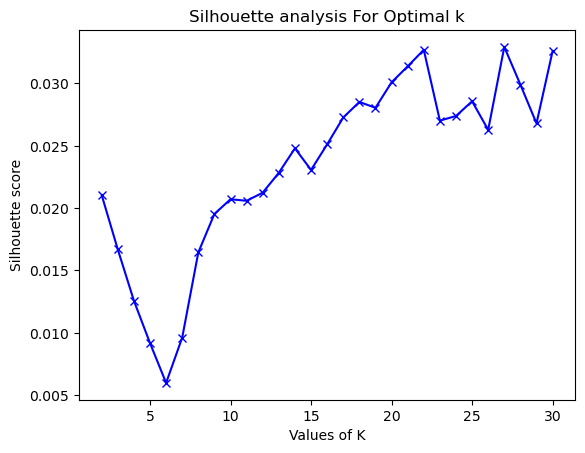

In [13]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(binary_attributes_df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(binary_attributes_df, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [14]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 31)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(binary_attributes_df)
 
    distortions.append(sum(np.min(cdist(binary_attributes_df, kmeanModel.cluster_centers_,
                                        'cosine'), axis=1)) /binary_attributes_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(binary_attributes_df, kmeanModel.cluster_centers_,
                                   'cosine'), axis=1)) / binary_attributes_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


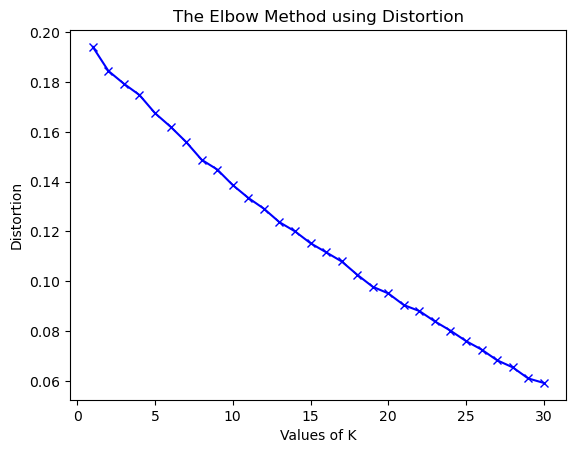

In [15]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

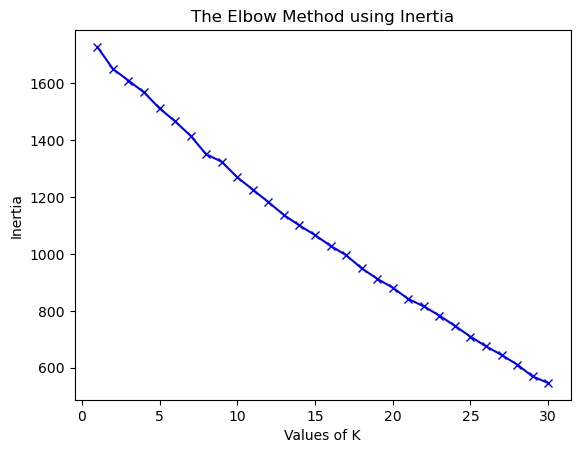

In [16]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [17]:
labels = KG_embeddiongs_df['classes']
kmeans = KMeans(n_clusters=18, random_state=0)
kmeans.fit(binary_attributes_df)
clusters = kmeans.predict(binary_attributes_df)
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])
clusters_df.head()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,K_mean
0,5
1,7
2,5
3,5
4,10


In [18]:
binary_attributes_df = pd.concat([binary_attributes_df, labels], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['order']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['family']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, clusters_df['K_mean']], axis = 1)
binary_attributes_df.to_csv("C:\Dissertation\Data\Processed Data\Wordnet_binary_vectors.csv")
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,classes,order,family,K_mean
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,antelope,ARTIODACTYLA,BOVIDAE,5
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,grizzly+bear,CARNIVORA,URSIDAE,7
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,killer+whale,ARTIODACTYLA,DELPHINIDAE,5
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,beaver,RODENTIA,APLODONTIIDAE,5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,dalmatian,CARNIVORA,CANIDAE,10


# 7. Spatialise Binary vectors

In [19]:
tsne = TSNE(n_components=2, verbose=0, random_state=100, metric = 'cosine', perplexity=15.0)
#binary
tsne_binary= tsne.fit_transform(binary_attributes_df.iloc[:,:-4]) 
tsne_binary_df = pd.DataFrame(data = tsne_binary
             , columns = ['binarycomp-1', 'binarycomp-2'])

#concat
tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['order']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['family']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
source = tsne_binary_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='binarycomp-1:Q',
    y='binarycomp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)